# UFO

#### UFORC (National UFO Reporting Center)  Data

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from datetime import datetime

In [63]:
df_every_thing = pd.read_json('jurgis_sightings_1.json')
df_every_thing = df_every_thing.rename(index=str, columns={'Occurred ':'Occurred'})

In [20]:
def get_time_of_occurrence(data):
    """
    Takes the input of the whole dataframe
    Return:
       - Time and date of occurrance and report
       - Year of occurrance
    """
    data = data.rename(index=str, columns={'Occurred ':'Occurred'})
    occur_report = data[['Occurred', 'Reported']]
    df_time_occur_report = occur_report.assign(Occurred=occur_report.Occurred.str.split('(',n=1).str[0])
    #Create new column for years
    df_time_occur_report['year'] = np.nan
    df_time_occur_report.Occurred = df_time_occur_repor`t.Occurred.str.strip()
    converted_time = to_datetime_add_year(df_time_occur_report.Occurred)
    df_time_occur_report.Occurred = converted_time
    #Assigns years of occurance to the column
    for i in range(len(df_time_occur_report.Occurred)):
        df_time_occur_report.year[i] = df_time_occur_report.Occurred[i].year
    return df_time_occur_report

In [21]:
def to_datetime_add_year(date):
    """
    Changes the date format of the dataframe
    Returns:
       - Updated time formats
    """
    converted = pd.DataFrame(pd.to_datetime(date,format='%m/%d/%Y %H:%M', 
                   errors = 'coerce', exact=True))
    converted_2 = pd.DataFrame(pd.to_datetime(date,format='%m/%d/%Y', 
                   errors = 'coerce', exact=True))
    values = converted_2[~converted_2.Occurred.isnull()]
    converted.update(values)
    
    return converted

In [111]:
%%time
df_every_thing = check_for_empty_values(df_every_thing, 'Occurred')
converted = get_time_of_occurrence(df_every_thing)

C:\Users\jurgi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Wall time: 30.9 s


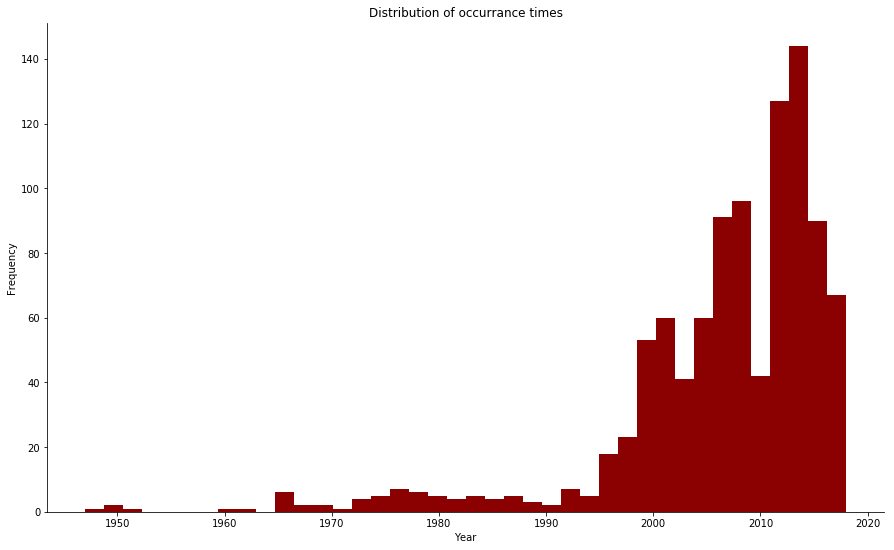

In [150]:
def distribution_histogram(data, feature):
    plotting_data = data[feature].dropna()
    plt.figure(figsize=(15,9))
    plot = plt.hist(plotting_data, bins = 40, color = '#8B0000')
    # Tweak the visual presentation
    #plt.xaxis.grid(True)
    plt.title('Distribution of occurrance times')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    sns.despine(trim=False, left=False)
    
distribution_histogram(converted, 'year')

In [107]:
def check_for_empty_values(data, feature):
    """
    Checks for the missing values in our dataset
    And transforms the missing values into NaNs
    """
    feature_names = list(data)
    data[feature] = data[feature].str.strip()
    data[feature] = np.where(data[feature] != '', data[feature], np.NaN)
    nan_count = data[feature].isna().sum()
    
    print('{} feature has {} missing values'.format(feature, nan_count))
    return data

In [115]:
clean_data = check_for_empty_values(df_every_thing, "Duration")


Duration feature has 31 missing values


In [74]:
new_data.head()

,Duration,Location,Occurred,Posted,Reported,Shape,Summary,url
100006,10 minutes,"Meriden, CT",12/14/2014 09:50 (Entered as : 12/14/2014 9:50),12/18/2014,12/14/2014 7:30:05 PM 19:30,Triangle,['1 Very Large triangle shaped 5 lights around...,http://www.nuforc.org/webreports/115/S115994.html
100012,~1 minute,"National City, CA",12/10/2014 18:45 (Entered as : 12/10/2014 18:45),12/18/2014,12/18/2014 2:09:28 AM 02:09,Triangle,['I had a sighting on 12-10-14 in National Cit...,http://www.nuforc.org/webreports/116/S116081.html
100050,1 minute,"Huron, SD",11/13/2014 21:00 (Entered as : 11/13/14),11/14/2014,11/13/2014 8:53:16 PM 20:53,Triangle,"['The UFO looked BIG.', 'I had seen three redd...",http://www.nuforc.org/webreports/115/S115340.html
100115,30 minutes,"Middleburg, FL",10/10/2014 21:30 (Entered as : 10/10/2014 21:30),11/6/2014,10/10/2014 8:32:36 PM 20:32,Triangle,"['I was taking my dog out about 9:30 pm, and I...",http://www.nuforc.org/webreports/114/S114420.html
100124,3-4 minutes,"Gainesville, TX",10/7/2014 23:50 (Entered as : 10/07/2014 23:50),10/10/2014,10/7/2014 11:04:22 PM 23:04,Triangle,['We witnessed a triangular shaped object with...,http://www.nuforc.org/webreports/114/S114314.html


In [75]:
new_data['Duration'] = np.where(new_data['Duration'] != '', new_data['Duration'], np.NaN)

In [89]:
new_data.Shape.isna().sum()

28